# Dependencies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as XGB
from sklearn import metrics

In [9]:
df = pd.read_csv("../input/db.csv",index_col=False)

In [10]:
df.head()

,Serial Number !,Interphase-1,Coating,PyC,SiC,BN,Fabrication Temperature,Fabrication Time,Overall Interphase thickness,Fiber Density,Fiber Volume Fractions,Number of Fibers per Tow,Fiber Radius,Fiber Tensile Modulus or Young modulus or Tensile Modulus,Tensile Strength,Tensile Young's Modulus,Tensile Fracture Strain,Tensile Testing Temperature
0,4.0,PyC,NaN,1,0,0,1000.0,NaN,35.0,NaN,NaN,500.0,6.0,NaN,950.0,NaN,0.2,900.0
1,5.0,PyC,NaN,1,0,0,NaN,NaN,100.0,NaN,0.66,500.0,6.5,354.0,1200.0,350.0,0.7,25.0
2,6.0,NaN,Uncoated,0,0,0,NaN,NaN,NaN,NaN,0.27,400.0,NaN,195.0,NaN,195.0,1.2,NaN
3,NaN,NaN,BN,0,0,1,1400.0,NaN,NaN,NaN,0.27,NaN,NaN,171.0,NaN,176.0,0.8,NaN
4,7.0,PyC,NaN,1,0,0,NaN,NaN,100.0,NaN,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# saving the feature names into a list
f_name=list(df.columns)
lenn=len(f_name)

for i in range(0,lenn):
    print(i, " = ",f_name[i])

0  =  Serial Number !
1  =  Interphase-1
2  =  Coating
3  =  PyC
4  =  SiC
5  =  BN
6  =  Fabrication Temperature 
7  =  Fabrication Time
8  =  Overall Interphase thickness
9  =  Fiber Density
10  =  Fiber Volume Fractions
11  =  Number of Fibers per Tow
12  =  Fiber Radius
13  =  Fiber Tensile Modulus or Young modulus or Tensile Modulus
14  =  Tensile Strength 
15  =  Tensile Young's Modulus
16  =  Tensile Fracture Strain
17  =  Tensile Testing Temperature


In [12]:
#renaming features
df = df.rename(columns={'Fiber Tensile Modulus or Young modulus or Tensile Modulus': 'Fiber Modulus', 
                        'Tensile Strength ': 'Strength',
                        'Tensile Fracture Strain':'Strain'
                        }
              )

In [13]:
print(df.keys())

Index(['Serial Number !', 'Interphase-1', 'Coating', 'PyC', 'SiC', 'BN',
       'Fabrication Temperature ', 'Fabrication Time',
       'Overall Interphase thickness', 'Fiber Density',
       'Fiber Volume Fractions', 'Number of Fibers per Tow', 'Fiber Radius',
       'Fiber Modulus', 'Strength', 'Tensile Young's Modulus', 'Strain',
       'Tensile Testing Temperature'],
      dtype='object')


In [16]:
df.shape

(99, 18)

In [17]:
# Check the missing values
df.isnull().sum()

Serial Number !                 81
Interphase-1                    11
Coating                         89
PyC                              0
SiC                              0
BN                               0
Fabrication Temperature         16
Fabrication Time                39
Overall Interphase thickness    11
Fiber Density                   33
Fiber Volume Fractions          11
Number of Fibers per Tow        40
Fiber Radius                    27
Fiber Modulus                   29
Strength                         6
Tensile Young's Modulus         70
Strain                          49
Tensile Testing Temperature     31
dtype: int64

In [18]:
df.drop(df.columns[[0, 1, 2,7,11,15]], axis=1, inplace=True)

In [19]:
# saving the feature names into a list
f_name=list(df.columns)
lenn=len(f_name)

for i in range(0,lenn):
    print(i, " = ",f_name[i])

0  =  PyC
1  =  SiC
2  =  BN
3  =  Fabrication Temperature 
4  =  Overall Interphase thickness
5  =  Fiber Density
6  =  Fiber Volume Fractions
7  =  Fiber Radius
8  =  Fiber Modulus
9  =  Strength
10  =  Strain
11  =  Tensile Testing Temperature


In [20]:
# Check the missing values
df.isnull().sum()

PyC                              0
SiC                              0
BN                               0
Fabrication Temperature         16
Overall Interphase thickness    11
Fiber Density                   33
Fiber Volume Fractions          11
Fiber Radius                    27
Fiber Modulus                   29
Strength                         6
Strain                          49
Tensile Testing Temperature     31
dtype: int64

In [21]:
# checking the number of rows and columns
df.shape

(99, 12)

In [22]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PyC                           99 non-null     int64  
 1   SiC                           99 non-null     int64  
 2   BN                            99 non-null     int64  
 3   Fabrication Temperature       83 non-null     float64
 4   Overall Interphase thickness  88 non-null     float64
 5   Fiber Density                 66 non-null     float64
 6   Fiber Volume Fractions        88 non-null     float64
 7   Fiber Radius                  72 non-null     float64
 8   Fiber Modulus                 70 non-null     float64
 9   Strength                      93 non-null     float64
 10  Strain                        50 non-null     float64
 11  Tensile Testing Temperature   68 non-null     float64
dtypes: float64(9), int64(3)
memory usage: 9.4 KB


In [23]:
  df.isnull().sum()

PyC                              0
SiC                              0
BN                               0
Fabrication Temperature         16
Overall Interphase thickness    11
Fiber Density                   33
Fiber Volume Fractions          11
Fiber Radius                    27
Fiber Modulus                   29
Strength                         6
Strain                          49
Tensile Testing Temperature     31
dtype: int64

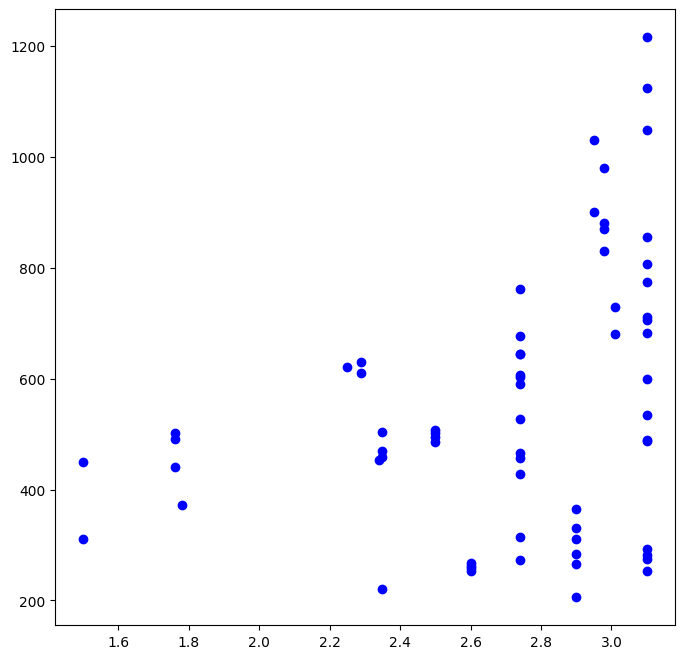

In [24]:
plt.figure(figsize=(8, 8))
plt.plot(df['Fiber Density'], df['Strength'], 'bo');


## Handling Missing values



In [25]:
t=int(input("1 for mean, 2 for -1, 3 for KNeighborsRegressor: "))
if(t==1):
    print("Opted for mean\n")
    df.fillna(df.mean(),inplace=True)
elif(t==2):
    print("Opted for -1\n")
    df.fillna(value=-1,inplace=True)
else:
    print("Opted for KNeighborsRegressor\n")
    from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
    def impute_knn(df):
    
        ''' inputs: pandas df containing feature matrix '''
        ''' outputs: dataframe with NaN imputed '''
        # imputation with KNN unsupervised method

        # separate dataframe into numerical/categorical
        ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
        ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
        # define columns w/ and w/o missing data
        cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
        cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

        for col in cols_nan:                
            imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
            imp_train = ldf.dropna()          # all indicies which which have no missing data 
            model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
            knr = model.fit(imp_train[cols_no_nan], imp_train[col])
            ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
        return pd.concat([ldf,ldf_putaside],axis=1)
    # Call function that imputes missing data
    df = impute_knn(df)
    

Opted for KNeighborsRegressor



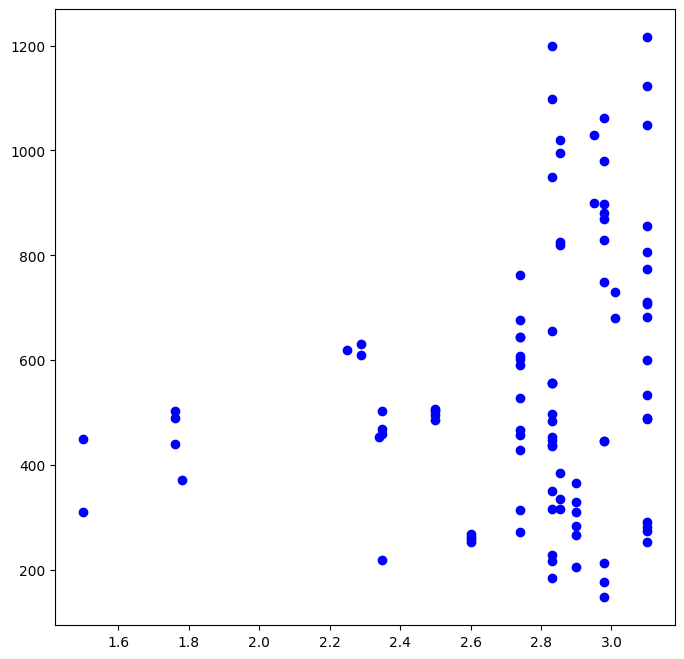

In [26]:
plt.figure(figsize=(8, 8))
plt.plot(df['Fiber Density'], df['Strength'], 'bo');

In [27]:
f_name=list(df.columns)
train=[x for i,x in enumerate(f_name) if i!=9]
test=f_name[9]
print(test)

Strength


In [28]:
train
test

'Strength'

In [29]:
df.head()

,PyC,SiC,BN,Fabrication Temperature,Overall Interphase thickness,Fiber Density,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strength,Strain,Tensile Testing Temperature
0,1,0,0,1000.0,35.0,2.830,0.436,6.0,325.0,950.0,0.200,900.0
1,1,0,0,637.6,100.0,2.830,0.660,6.5,354.0,1200.0,0.700,25.0
2,0,0,0,637.6,466.0,2.980,0.270,6.1,195.0,445.6,1.200,25.0
3,0,0,1,1400.0,636.0,2.854,0.270,6.1,171.0,335.8,0.800,25.0
4,1,0,0,637.6,100.0,2.830,0.580,5.8,325.0,556.2,0.616,355.0


In [31]:
#export the predicted df to csv
df.to_csv("../input/knnimputer_db.csv",index=False)

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_1965/3586946306.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Strength'])


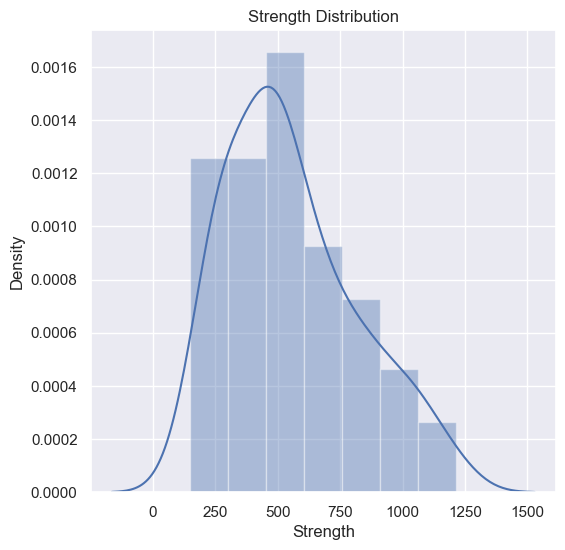

In [32]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Strength'])
plt.title('Strength Distribution')
plt.show()

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_1530/3700156843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fiber Density'])


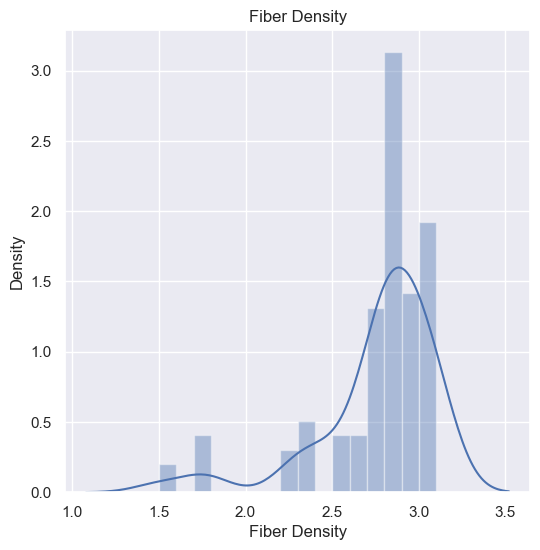

In [57]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Fiber Density'])
plt.title('Fiber Density')
plt.show()

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_1530/2566624361.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fiber Volume Fractions'])


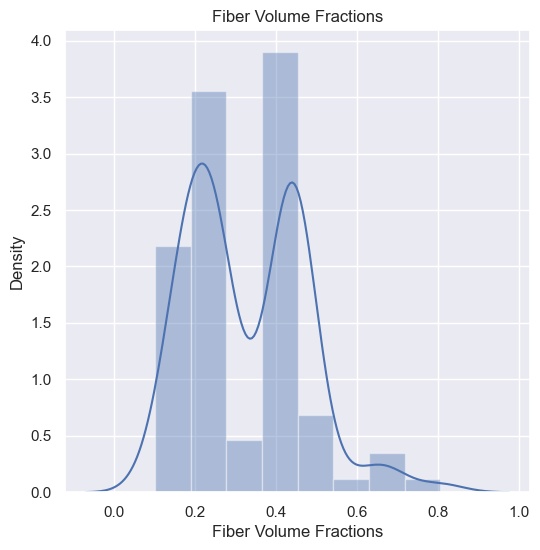

In [58]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Fiber Volume Fractions'])
plt.title('Fiber Volume Fractions')
plt.show()

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_1530/3697658870.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fabrication Temperature '])


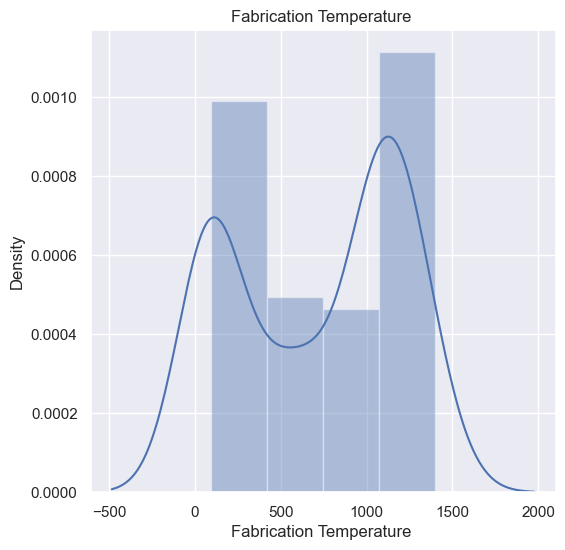

In [59]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Fabrication Temperature '])
plt.title('Fabrication Temperature ')
plt.show()

## Correlation

In [33]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_1965/3929055914.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


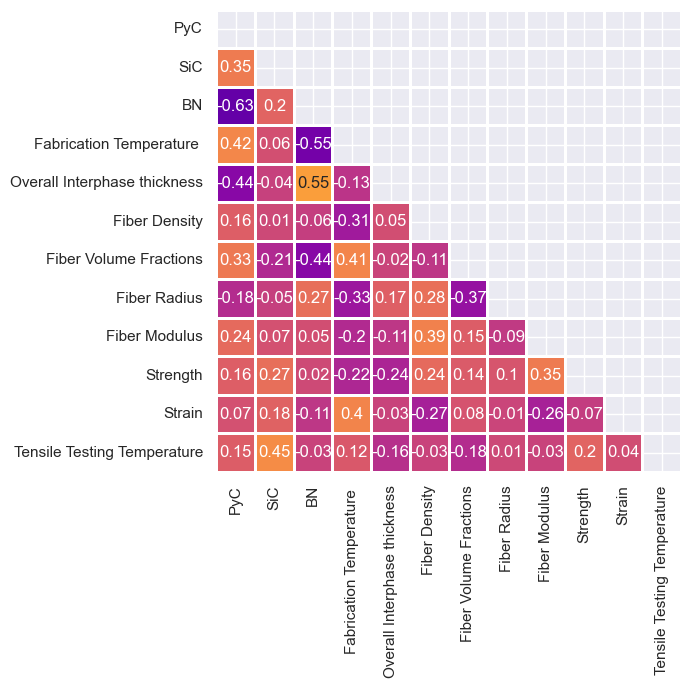

In [34]:
corrMat(df)

In [35]:
X = df[train]
Y = df[test]

In [36]:
train

['PyC',
 'SiC',
 'BN',
 'Fabrication Temperature ',
 'Overall Interphase thickness',
 'Fiber Density',
 'Fiber Volume Fractions',
 'Fiber Radius',
 'Fiber Modulus',
 'Strain',
 'Tensile Testing Temperature']

In [46]:
print(X)

[[0.33333333 0.         0.         ... 0.73214286 0.06493506 0.74468085]
 [0.33333333 0.         0.         ... 0.83571429 0.38961039 0.        ]
 [0.         0.         0.         ... 0.26785714 0.71428571 0.        ]
 ...
 [0.         0.         0.5        ... 0.28571429 0.51948052 0.        ]
 [0.         0.         0.5        ... 0.57142857 0.42857143 0.        ]
 [0.         0.         0.5        ... 0.92857143 0.11038961 0.        ]]


In [47]:
print(Y)

0      950.0
1     1200.0
2      445.6
3      335.8
4      556.2
       ...  
94     253.5
95     268.1
96     310.0
97     440.0
98     450.0
Name: Strength, Length: 99, dtype: float64


In [38]:
import pandas as pd
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from xgboost import XGBRegressor as XGB

In [39]:
df.shape

(99, 12)

In [49]:
X

array([[0.33333333, 0.        , 0.        , ..., 0.73214286, 0.06493506,
        0.74468085],
       [0.33333333, 0.        , 0.        , ..., 0.83571429, 0.38961039,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.26785714, 0.71428571,
        0.        ],
       ...,
       [0.        , 0.        , 0.5       , ..., 0.28571429, 0.51948052,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 0.57142857, 0.42857143,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 0.92857143, 0.11038961,
        0.        ]])

In [41]:
y

NameError: name 'y' is not defined

In [52]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE regressor
smote = SMOTE()

# Fit the SMOTE regressor to the data and generate synthetic samples
X_oversampled, y_oversampled = smote.fit_resample(X, Y)

# Print the shape of the original and oversampled data
print("Original Data:", X.shape, Y.shape)
print("Oversampled Data:", X_oversampled.shape, y_oversampled.shape)


ValueError: Unknown label type: 'continuous'

# Loss Curve Plotting

Epoch 1: Train Loss = 0.0003, Val Loss = 0.0232
Epoch 2: Train Loss = 0.0003, Val Loss = 0.0233
Epoch 3: Train Loss = 0.0003, Val Loss = 0.0224
Epoch 4: Train Loss = 0.0003, Val Loss = 0.0236
Epoch 5: Train Loss = 0.0003, Val Loss = 0.0223
Epoch 6: Train Loss = 0.0003, Val Loss = 0.0236
Epoch 7: Train Loss = 0.0003, Val Loss = 0.0232
Epoch 8: Train Loss = 0.0003, Val Loss = 0.0232
Epoch 9: Train Loss = 0.0003, Val Loss = 0.0238
Epoch 10: Train Loss = 0.0003, Val Loss = 0.0233
Epoch 11: Train Loss = 0.0003, Val Loss = 0.0234
Epoch 12: Train Loss = 0.0003, Val Loss = 0.0239
Epoch 13: Train Loss = 0.0003, Val Loss = 0.0233
Epoch 14: Train Loss = 0.0003, Val Loss = 0.0226
Epoch 15: Train Loss = 0.0003, Val Loss = 0.0231
Epoch 16: Train Loss = 0.0003, Val Loss = 0.0231
Epoch 17: Train Loss = 0.0003, Val Loss = 0.0235
Epoch 18: Train Loss = 0.0003, Val Loss = 0.0245
Epoch 19: Train Loss = 0.0003, Val Loss = 0.0232
Epoch 20: Train Loss = 0.0003, Val Loss = 0.0223
Epoch 21: Train Loss = 0.0003

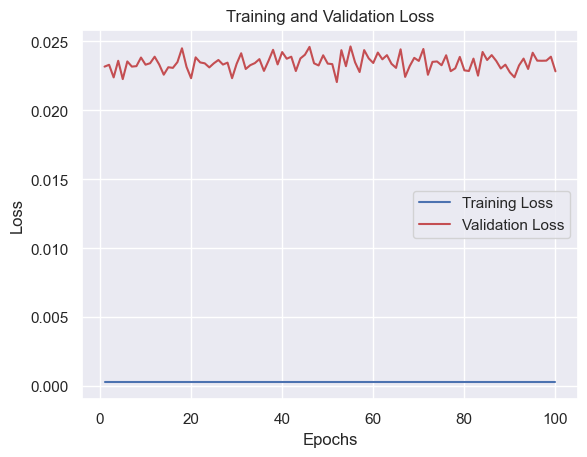

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load and preprocess the data
# Assume X and y are your input features and target variable, respectively

scaler = MinMaxScaler()
df_1 = pd.read_csv("../input/knnimputer_db.csv")
df = pd.DataFrame(scaler.fit_transform(df_1),columns=df_1.columns)

X = df.drop("Strength", axis=1).values
y = df.Strength.values


# Step 2: Initialize the model
model = ExtraTreesRegressor()

# Step 3: Perform cross-validation
num_epochs = 100
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    fold_train_losses = []
    fold_val_losses = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Compute train loss
        y_train_pred = model.predict(X_train)
        train_mse = np.mean((y_train_pred - y_train) ** 2)
        fold_train_losses.append(train_mse)
        
        # Compute validation loss
        y_val_pred = model.predict(X_val)
        val_mse = np.mean((y_val_pred - y_val) ** 2)
        fold_val_losses.append(val_mse)
    
    # Average the losses across folds
    avg_train_loss = np.mean(fold_train_losses)
    avg_val_loss = np.mean(fold_val_losses)
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    
    # Print the current epoch and corresponding loss
    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

# Step 4: Plot the train and validation loss curves
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
print(X.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'